**About This Course:**

*Modul ini akan membahas beragam cara memvisualisasikan data, terutama cara memilih grafik yang tepat serta memodifikasinya agar fokus pada pesan yang ingin disampaikan.* 

*Modul ini juga akan menuntun kamu untuk memahami elemen-elemen pada grafik sehingga kamu dapat mengubah elemen-elemen tersebut sesuai kebutuhan.* 

*Modul ini tidak akan mengajarkan kamu menjadi seorang analis data dengan kemampuan desain grafis sekaligus. Namun, setidaknya kamu dapat memahami bagaimana sebuah desain visual dapat membantu audiens memahami data yang disajikan.*

**Table of Content:**

1. *Kenapa Perlu Visualisasi Data dan Bagaimana Caranya?*
2. *Jenis Grafik dan Penggunaannya*
3. *Mini Project*

**START**

**Module : Mini Project**

**Visualisasi Data 1**

*Terdapat sejumlah data tentang karyawan di perusahaan A. Lalu aku diminta untuk mempresentasikan sebagian data itu kepada pimpinan. Salah satu data yang hendak ditampilkan adalah jumlah karyawan berdasarkan jenis kelamin dalam kelompok usia tertentu. Pimpinan perusahaan ingin melihat postur jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia mereka.*

1. *Aku pun diminta menampilkan grafik yang simpel, tetapi padat informasi. Grafik itu membandingkan banyaknya jumlah karyawan laki-laki dan perempuan dalam setiap kelompok umur yang sama.*

2. *Tantangannya adalah, grafik tersebut harus menunjukkan postur jumlah karyawan berdasarkan jenis kelamin dan rentang usianya sekaligus.*

*Bagaimana caraku membuat grafik ini menjadi lebih ringkas dan mudah terbaca?*

**Target**

1. *Grafik yang lebih simpel dan hemat ruang.*
2. *Komparasi jumlah karyawan laki-laki dan perempuan berdasarkan rentang usia.*

**Berikut adalah data karyawan di perusahaan A.**

In [6]:
import pandas as pd

data = {'Kelompok Usia' : ['21-25 tahun', '26-30 tahun', '31-35 tahun', '36-40 tahun', '41-45 tahun', '46-50 tahun', '51-55 tahun'],
   'Laki-laki' : [45, 124, 198, 353, 516, 502, 417],
   'Perempuan' : [53, 156, 208, 332, 420, 319, 199]}

df = pd.DataFrame(data)
df.head(10)

,Kelompok Usia,Laki-laki,Perempuan
0,21-25 tahun,45,53
1,26-30 tahun,124,156
2,31-35 tahun,198,208
3,36-40 tahun,353,332
4,41-45 tahun,516,420
5,46-50 tahun,502,319
6,51-55 tahun,417,199


*Dengan menggunakan data karyawan di atas, aku bisa mengerjakan dengan menggunakan aplikasi Google spreadsheet, Excel, LibreOffice atau OpenOffice untuk memplotkan data ini, tentunya di laptop/komputer ku nantinya.* 

*Akan tetapi kali ini aku akan melakukannya dengan menggunakan Matplotlib (salah satu library plotting di Python). Aku pun tidak khawatir karena aku hanya akan diminta mengetikkan ulang kode yang telah diberikan.*

**Visualisasi - Part 1: Matplotlib**

               Laki-laki  Perempuan
Kelompok Usia                      
51-55 tahun          417        199
46-50 tahun          502        319
41-45 tahun          516        420
36-40 tahun          353        332
31-35 tahun          198        208
26-30 tahun          124        156
21-25 tahun           45         53


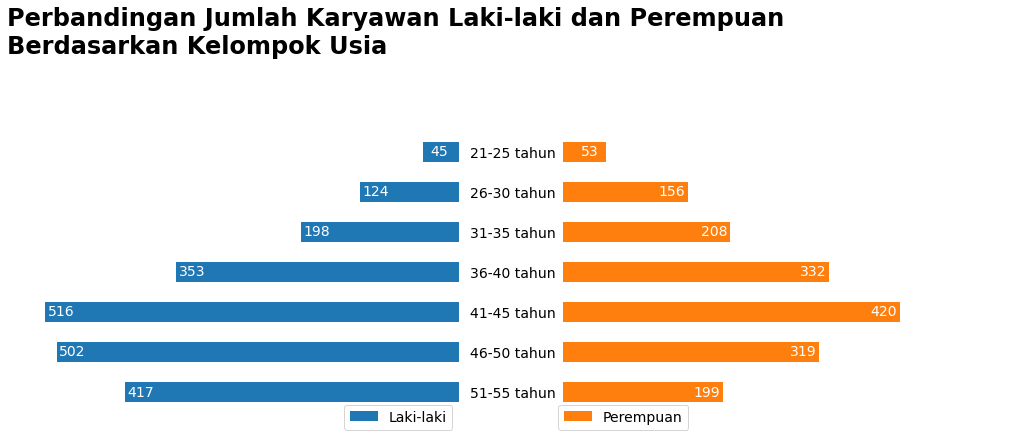

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = df.sort_values("Kelompok Usia", ascending=False).set_index("Kelompok Usia")
print(tabel)

tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia",
			x=0., y=1.0, fontsize=24, fontweight="bold", ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0, 550])
axes[0].set_ylabel("")
axes[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False, labelbottom=False)
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel["Laki-laki"]), list(tabel["Perempuan"])):
	axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20, i),
					color="w", va="center", ha="center", fontsize=14)
	axes[1].annotate(str(abs(w)), (w-20, i), xytext=(w-20, i),
					color="w", va="center", ha="center", fontsize=14)
plt.tight_layout(rect=(0,0,1,0.88))
plt.show()

**Solusi Visualisasi Data 1**

*Grafik kolom kurang cocok untuk menampilkan banyak kategori, dalam hal ini adalah rentang usia karyawan. Ada tujuh kelompok usia dalam tabel data, masing-masing memiliki keterangan sebanyak 11 karakter (huruf). Jika keterangan ini dijejer pada sumbu X, akan melebar dan makan tempat, bukan?*

*Pilihan yang lebih baik adalah menggunakan dua bar chart yang disusun menjadi piramida. Jenis grafik ini dapat menempatkan batang-batang grafik menjadi lebih berdekatan sehingga menghemat ruang tampilan. Dengan ukuran gambar yang sama seperti grafik sebelumnya, dimungkinkan juga untuk memilih ukuran huruf lebih besar dan lebih terbaca.*

*Sebagai catatan, ada trik khusus jika ingin membuatnya di Excel. Pada contoh ini, grafik tersebut sebetulnya terdiri dari dua grafik terpisah, masing-masing untuk laki-laki dan perempuan. Khusus untuk grafik laki-laki, hanya perlu mengubah nilai pada sumbu X menjadi terbaca dari kanan ke kiri (reverse order). Selain itu dapat juga mengubahnya pada jendela Format Data Series dalam Excel.*

**Visualisasi Data 2**

*Pimpinan perusahaan merasa kesal karena setiap kali rapat, analis data mempresentasikan data report yang bertele-tele. Selain itu, ia selalu meragukan kesahihan kesimpulan dalam laporan itu karena analisis tidak dilakukan secara detail.*

*Ketika analis data itu memberikan data lebih detail, pimpinan perusahaan semakin kesal karena yang ditampilkan adalah data mentah yang masih sangat kotor dan harus ia simpulkan sendiri.*

*Pimpinan tersebut juga berkali-kali bertanya tentang data, yang disajikan dalam bentuk grafik tiga dimensi atau grafik yang penuh dengan label data dengan garis dan blok warna-warni yang mencolok mata.*

*Kali ini aku mendapat tugas dari Senja untuk memperbaiki laporan dari contoh kasus tersebut.* 

1. ***Tujuannya** menyajikan visualisasi data yang enak dilihat, alur narasinya tepat, dan kesimpulannya benar.*

2. ***Tugasnya** mencari karyawan dengan tren produktivitas paling baik selama satu tahun lalu untuk mendapatkan reward sebagai best employee.*

**Tujuan**
1. *Memilih jenis grafik yang benar*
2. *Menyederhanakan tampilan grafik*
3. *Memilah dan menonjolkan informasi yang diperlukan*

**Berikut adalah data karyawan di perusahaan:**

In [11]:
tabel_2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv")

df = pd.DataFrame(tabel_2)
df.head()

,Bulan,Karyawan A,Karyawan B,Karyawan C,Karyawan D,Karyawan E
0,Januari,24345,30128,21039,26472,27894
1,Februari,25739,24678,20983,25382,28763
2,Maret,26489,25402,22321,28757,26748
3,April,23455,27320,23759,24443,26839
4,Mei,21093,22390,25873,32901,27110


**Visualisasi - Part 2: Matplotlib**

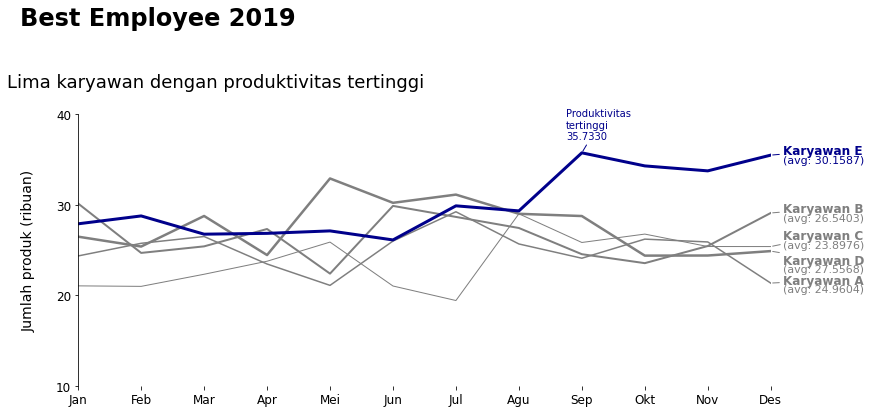

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv", index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019", x=0.01, y=0.95, fontsize=24, fontweight="bold", ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [ 1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line", ax=ax, xlim=[0, 11], ylim=[10, 40], color=colors,
			   xticks=range(tabel.shape[0]), yticks=[10, 20, 30, 40])

add_lbl_pos = [ 0.3,  0.5,  1.2, -1.0,  0.5]
add_avg_pos = [-0.7, -0.5,  0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
	item.set_linewidth(line_widths[i])
	lbl = item.get_label()
	ax.annotate(lbl, (11, tabel.loc["Desember", lbl]),
			   (11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
			   fontweight="bold", fontsize=12, color=colors[i], va="center",
			   arrowprops={"arrowstyle":"-", "color":colors[i]})
	ax.annotate("(avg: %.4f)" % tabel[lbl].mean(), (11, tabel.loc["Desember", lbl]),
			   (11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]),
			   fontsize=11, color=colors[i], va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod,
		   (8, highest_prod), (7.75, highest_prod+1.5),
		   ha="left", color=colors[-1], arrowprops={"arrowstyle": "-", "color": colors[-1]})
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.tight_layout(rect=(0,0,1,0.90))
plt.show()

**Solusi Visualisasi Data 2**

*Senja membantuku dengan memberi hint untuk mengganti jenis grafik batang menjadi grafik garis. Kenapa? **Karena jenis inilah yang paling cocok untuk menggambarkan data produktivitas dari waktu ke waktu.***

*Agar desainnya lebih simpel dan mudah dipahami, Senja juga menyarankan agar aku menyederhanakan tampilan grafik tersebut dengan langkah-langkah berikut ini:*

1. ***Memilih jenis grafik garis (line chart).** Jenis grafik ini cocok untuk menampilkan perubahan nilai variabel dari waktu ke waktu dengan elemen yang lebih sederhana dibanding grafik batang horizontal.*
2. ***Menghilangkan garis tepi grafik.** Menghilangkan garis tepi akan memberi kesan ruang grafik yang luas.*
3. ***Menghilangkan grid line/area.** Jika yang ditonjolkan adalah pola garis naik-turun grafik, grid line dapat disamarkan atau dihilangkan sama sekali. Jika tidak, area grafik akan penuh oleh garis saling silang.*

4. ***Menghapus label data dan marker.** Terlalu banyak label data justru akan membuat tampilan grafik menjadi penuh dan terkesan berantakan. Tentu saja boleh menghilangkan seluruhnya atau tampilkan label data pada titik-titik tertentu saja. Hanya saja jangan lupa hindari penggunaan warna pekat pada label data, kecuali bila nilai data itu menjadi sorotan utama.*
5. ***Menyederhanakan keterangan sumbu X dan Y.** Jika sumbu XY memuat angka ribuan atau lebih, ringkaslah angka itu dengan menyederhanakan nilai angka pada setiap sumbu. Jangan lupa memunculkan satuan angka pada sumbu tersebut.*
6. ***Mengatur legenda, judul, subjudul, keterangan.** Diperlukan permainan tipografi dan penempatan teks yang tepat. Judul haruslah berukuran paling besar dan warna pekat. Ukuran huruf dan warna untuk elemen lain diatur lebih kecil dan lebih tipis. Lekatkan legenda dengan elemen grafik (dalam hal ini garis-garis grafik) untuk memudahkan pembaca mencari keterangan atas grafik tersebut.*
7. ***Mengganti warna, tebal garis.** Tidak ada patokan khusus mengenai jumlah warna dan ukuran garis. Namun, pastikan bahwa elemen yang paling menonjol diberi warna lebih pekat dari elemen lain.*

*Desain ini dipilih karena tujuannya adalah mencari satu karyawan yang memiliki produktivitas tertinggi. Produktivitas itu dapat terlihat dari tren kenaikan jumlah produksi dari awal hingga akhir tahun. Bisa pula terlihat dari rata-rata jumlah produksi.*

*Setelah satu karyawan terbaik terpilih, grafik untuk karyawan lain dapat disamarkan dengan warna lebih tipis, demikian pula tebal garisnya.*

*Bagaimana dengan zero baseline yang tidak dimulai dari angka nol? Di sinilah fleksibilitas grafik garis dibandingkan dengan grafik batang. Dengan grafik batang, garis dasar nol pada sumbu X wajib digunakan. Dalam contoh ini, nilai minimum sumbu Y dimulai dengan angka 10 (ribuan) dan garis sumbu X dihilangkan karena garis tersebut sering diasumsikan sebagai garis nol.*

**Hasil Belajarku :)**

*Akhirnya, modul Introduction to Data Visualization telah ku selesaikan dengan baik. Berdasarkan materi-materi yang telah ku pelajari dan pahami serta praktekkan dalam modul ini, aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) yang diantaranya:*

1. *Mengenal visualisasi data*
2. *Urgensi visualisasi data*
3. *Visualisasi eksploratif versus naratif*
4. *Memetakan tujuan visualisasi data*
5. *Proses visualisasi data*
6. *Mengenal jenis grafik dan karakternya*
7. *Panduan singkat memilih grafik*
8. *Karakter visual suatu grafik*
9. *Bedah grafik*

**End of Module**